In [1]:
import cv2
import numpy as np

In [6]:
img = cv2.imread('images/fish.jpg')
rows, cols = img.shape[0:2]

dx, dy = 100,50

mtrx = np.float32([[1,0, dx],
                  [0, 1, dy]])

move_basic = cv2.warpAffine(img, mtrx,(cols+dx, rows+dy))

move_constant = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy),
                               None, None, cv2.BORDER_CONSTANT, (255,255,0))
move_reflect = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy), None, None, cv2.BORDER_WRAP)

cv2.imshow('original', img)
cv2.imshow('move1', move_basic)
cv2.imshow('move2', move_constant)
cv2.imshow('move3', move_reflect)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
img = cv2.imread('images/fish.jpg')
rows, cols = img.shape[0:2]

dx, dy = 100,50

mtrx = np.float32([[1,0, dx],
                  [0, 1, dy]])

move_basic = cv2.warpAffine(img, mtrx,(960, 540))

move_constant = cv2.warpAffine(img, mtrx, (960, 540),
                               None, None, cv2.BORDER_CONSTANT, (255,0,0))
move_reflect = cv2.warpAffine(img, mtrx, (960, 540), None, None, cv2.BORDER_WRAP)

cv2.imshow('original', img)
cv2.imshow('move1', move_basic)
cv2.imshow('move2', move_constant)
cv2.imshow('move3', move_reflect)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
img = cv2.imread('images/pixel.jpg')
height, width = img.shape[:2]

small_mtrx = np.float32([[0.6,0, 0],
                         [0, 0.6, 0]])

big_mtrx = np.float32([[2,0, 0],
                         [0, 2, 0]])

small_basic = cv2.warpAffine(img, small_mtrx,(int(height*0.6), int(width*0.6)))
big_basic = cv2.warpAffine(img, big_mtrx,(int(height*2), int(width*2)))
small_area = cv2.warpAffine(img, small_mtrx, (int(height*0.6), int(width*0.6)),None, cv2.INTER_AREA)
big_cubic = cv2.warpAffine(img, big_mtrx, (int(height*2), int(width*2)), None, cv2.INTER_CUBIC)
cv2.imshow('original', img)
cv2.imshow('small_basic', small_basic)
cv2.imshow('big_basic', big_basic)
cv2.imshow('move3', small_area)
cv2.imshow('big_cubic', big_cubic)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
import cv2
import numpy as np

img = cv2.imread('images/fish.jpg')
rows, cols = img.shape[:2]
theta45 = 45.0 * np.pi/180
theta90 = 90.0 * np.pi/180

# rows//2
# -1*cols//4
modify45 = np.float32([[np.cos(theta45), -1*np.sin(theta45), 0],
                      [np.sin(theta45), np.cos(theta45), 0]])
modify90 = np.float32([[np.cos(theta90), -1*np.sin(theta90), 0],
                      [np.sin(theta90), np.cos(theta90), 0]])

rotate45 = cv2.warpAffine(img, modify45, (rows, cols),
                         None, None, cv2.BORDER_CONSTANT, (255,255,255))
rotate90 = cv2.warpAffine(img, modify90, (rows, cols))

cv2.imshow('original', img)
cv2.imshow('45', rotate45)
cv2.imshow('90', rotate90)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
import cv2
import numpy as np

img = cv2.imread('images/fish.jpg')
rows, cols = img.shape[:2]
theta45 = 45.0 * np.pi/180
theta90 = 90.0 * np.pi/180

# rows//2
# -1*cols//4
modify45 = np.float32([[np.cos(theta45), -1*np.sin(theta45), rows//2],
                      [np.sin(theta45), np.cos(theta45), -1*cols//4]])
modify90 = np.float32([[np.cos(theta90), -1*np.sin(theta90), rows],
                      [np.sin(theta90), np.cos(theta90), 0]])

rotate45 = cv2.warpAffine(img, modify45, (rows, cols),
                         None, None, cv2.BORDER_CONSTANT, (255,255,255))
rotate90 = cv2.warpAffine(img, modify90, (rows, cols))

cv2.imshow('original', img)
cv2.imshow('45', rotate45)
cv2.imshow('90', rotate90)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
img = cv2.imread('images/pixel.jpg')
rows, cols = img.shape[:2]

modify45 = cv2.getRotationMatrix2D((cols/2, rows/2), 45,1)
modify90 = cv2.getRotationMatrix2D((cols/2, rows/2), 90,1)

img45 = cv2.warpAffine(img, modify45, (cols, rows),
                         None, None, cv2.BORDER_CONSTANT, (255,255,255))
img90 = cv2.warpAffine(img, modify90, (rows, cols))

cv2.imshow('original', img)
cv2.imshow('45', img45)
cv2.imshow('90', img90)
cv2.waitKey(0)
cv2.destroyAllWindows()

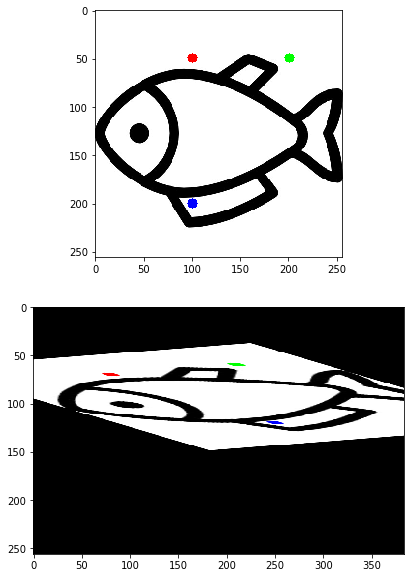

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('images/fish.jpg')
rows, cols = img.shape[:2]

pts1 = np.float32([[100,50],[200,50],[100,200]])
pts2 = np.float32([[80,70],[210,60],[250,120]])

cv2.circle(img, (100,50), 5, (255,0,0), -1)
cv2.circle(img, (200,50), 5, (0,255,0), -1)
cv2.circle(img, (100,200), 5, (0,0,255), -1)

mtrx = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, mtrx, (int(cols*1.5), rows))
# plt으로 이미지 격자 위치 확인한후 좌표 확인 가능
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.imshow(img)
plt.subplot(2, 1, 2)
plt.imshow(dst)
plt.show()
cv2.imshow('original', img)
cv2.imshow('affine', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('images/fish.jpg')
rows, cols = img.shape[:2]

pts1 = np.float32([[0,0], [0,rows], [cols,0], [cols, rows]])
pts2 = np.float32([[100,50],[10,rows-50],[cols-100,50],[cols-10,rows-50]])

cv2.circle(img, (0,0), 10, (255,0,0), -1)
cv2.circle(img, (0, rows), 10, (0,255,0), -1)
cv2.circle(img, (cols,200), 5, (0,0,255), -1)
cv2.circle(img, (cols,rows), 10, (0,255,255), -1)

mtrx = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(img, mtrx,(cols, rows))

cv2.imshow('original', img)
cv2.imshow('perspective', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
win_name = 'scanning'
img = cv2.imread('images/paper.jpg')
rows, cols = img.shape[:2]
draw = img.copy()
pts_cnt = 0
pts = np.zeros((4,2), dtype=np.float32)

def onMouse(event, x, y, flags, param):
    global pts_cnt
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(draw, (x,y), 10, (0,255,0), -1)
        cv2.imshow(win_name, draw)
        pts[pts_cnt] = [x,y]
        pts_cnt += 1
        if pts_cnt == 4:
            sm = pts.sum(axis=1)
            diff = np.diff(pts, axis=1)
            topLeft = pts[np.argmin(sm)]
            bottomRight = pts[np.argmax(sm)]
            topRight = pts[np.argmin(diff)]
            bottomLeft = pts[np.argmax(diff)]
            pts1 = np.float32([topLeft, topRight, bottomRight, bottomLeft])
            w1 = abs(bottomRight[0] - bottomLeft[0])
            w2 = abs(topRight[0] - topLeft[0])
            h1 = abs(topRight[1] - bottomRight[1])
            h2 = abs(topLeft[1] - bottomLeft[1])
            width = int(max([w1, w2]))
            height = int(max([h1, h2]))
            pts2 = np.float32([[0,0],[width-1,0],
                              [width-1,height-1], [0, height-1]])
            mtrx = cv2.getPerspectiveTransform(pts1, pts2)
            result = cv2.warpPerspective(img, mtrx, (width, height))
            cv2.imshow('scanned', result)

cv2.imshow(win_name, img)
cv2.setMouseCallback(win_name, onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()